

```
# FRBsynthesis

```

# FRB synthesis and Data file

In [ ]:
from google.colab import drive ; 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!git clone https://github.com/liamconnor/single_pulse_ml.git

Cloning into 'single_pulse_ml'...
remote: Enumerating objects: 1718, done.
remote: Total 1718 (delta 0), reused 0 (delta 0), pack-reused 1718
Receiving objects: 100% (1718/1718), 78.69 MiB | 20.78 MiB/s, done.
Resolving deltas: 100% (1191/1191), done.


In [ ]:
#first change the tensorflow package to 'tensorflow'
%rm /content/single_pulse_ml/setup.py
%cp '/gdrive/MyDrive/setup.py' '/content/single_pulse_ml'
%cd '/content/single_pulse_ml'
!python3 setup.py install


/content/single_pulse_ml
running install
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating single_pulse_ml.egg-info
writing single_pulse_ml.egg-info/PKG-INFO
writing dependency_links to single_pulse_ml.egg-info/dependency_links.txt
writing requirements to single_pulse_ml.egg-info/requires.txt
writing top-level names to single_pulse_ml.egg-info/top_level.txt
writing manifest file 'single_pulse_ml.egg-info/SOURCES.txt'
reading manifest file 'single_pulse_ml.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'single_pulse_ml.egg-info/SOURCES.txt'
installing libra

In [ ]:
%cd '/gdrive/'

/gdrive


In [ ]:
%rm '/usr/local/lib/python3.9/dist-packages/single_pulse_ml-0.1-py3.9.egg/single_pulse_ml/sim_parameters.py'
%cp '/gdrive/MyDrive/sim_parameters.py' '/usr/local/lib/python3.9/dist-packages/single_pulse_ml-0.1-py3.9.egg/single_pulse_ml/'

In [ ]:
#Goto /usr/local/lib/python3.8/dist-packages/single_pulse_ml-0.1-py3.8.egg/single_pulse_ml/sim_parameters.py and change line 88 to f = h5py.File(fnout, 'w')
#Now directly go to this path and run sims!
%cd /content/single_pulse_ml/single_pulse_ml

/content/single_pulse_ml/single_pulse_ml


In [ ]:
!python run_frb_simulation.py

/content/single_pulse_ml/single_pulse_ml/simulate_frb.py:640: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if ftype is 'hdf5':
2023-03-27 14:52:22.923811: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 14:52:24.338743: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 14:52:24.338935: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared ob

# Code Not Needed

In [ ]:
def data_reduction(data):
    data = data[0:32,93:157]
    return data

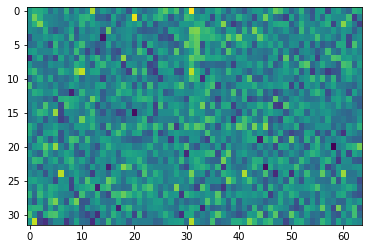

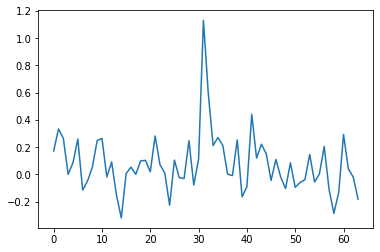

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(hf['data_freq_time'])
Y = np.array(hf['labels'])


Big_data = list()
for i in range(10000):
    data = data_reduction(X[i])
    Big_data.append(data)

X = np.vstack(Big_data)
#print(X.shape)
X = X.reshape(10000,32,64)
X.shape


#plt.hist()
plt.imshow(X[5001],aspect='auto')
plt.show()
plt.plot(np.mean(X[5001],axis=0))

In [ ]:
#test train dataset
x_train = ft_sim_set[0:8000] ; y_train = y_sim_set[0:8000]
x_test = ft_sim_set[8000:10000] ; y_test = y_sim_set[8000:10000]

x_train = x_train.reshape((8000,32,64,1))
x_test = x_test.reshape(2000,32,64,1)
y_train = y_train.reshape((-1,1)) ; y_test = y_test.reshape((-1,1))


y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

y_train[y_train == 1] = 1
y_test[y_test == 1] = 1

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

data_reduction(x_train[0])

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc.reshape(-1,1), y_test_enc.reshape(-1,1)

y_train,y_test = prepare_targets(y_train,y_test

# Data parse and Test train split

In [ ]:
import h5py
hf = h5py.File('/content/single_pulse_ml/single_pulse_ml/data/data_nt64_nf32_dm0_snr5-25_apertif_250.hdf5', 'r')
hf.keys()

<KeysViewHDF5 ['data_dm_time', 'data_freq_time', 'labels', 'params', 'snr']>

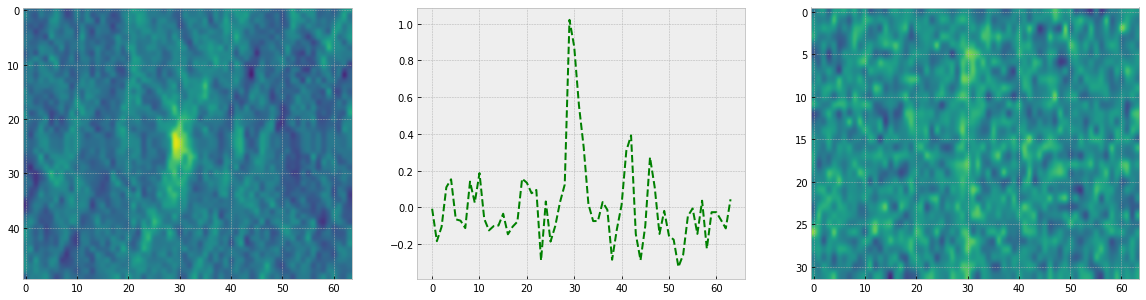

In [ ]:
import matplotlib.pyplot as plt ; plt.style.use('bmh')
import numpy as np


freq_time_dataset = np.array(hf['data_freq_time'])
dm_time_dataset = np.array(hf['data_dm_time'])
series_dataset = np.vstack(np.nanmean(hf['data_freq_time'],axis=1))
sn_set = np.array(hf['snr'])
label_set = np.array(hf['labels'])

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(dm_time_dataset[5756],aspect='auto',interpolation='gaussian')
#plt.show()
plt.subplot(1,3,2)

plt.plot(np.mean(freq_time_dataset[5756],axis=0),'--',color='green')
plt.subplot(1,3,3)

plt.imshow(freq_time_dataset[5756],aspect='auto',interpolation='gaussian')


In [ ]:
dm_time_dataset.shape

(10000, 50, 64)

(5000,)

In [ ]:
#shuffle the data_set
np.random.seed(777) #preserve seed for later use
idx = np.random.permutation(len(freq_time_dataset)) #preservers index
ft_sim_set = freq_time_dataset[idx] ; y_sim_set = label_set[idx]
dm_sim_set = dm_time_dataset[idx] ; series_sim_set = series_dataset[idx]
snr = sn_set[np.random.permutation(len(sn_set))]


In [ ]:
y_sim_set

array([1, 0, 1, ..., 0, 1, 0])

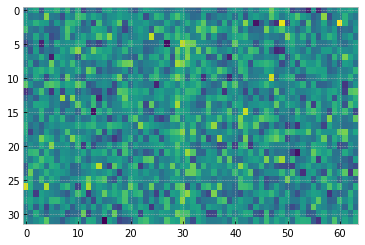

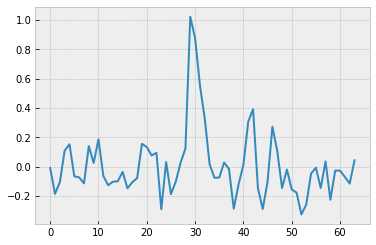

In [ ]:
#test the shuffling
plt.imshow(ft_sim_set[0],aspect='auto')
plt.show()
plt.plot(series_sim_set[0])

In [ ]:
!pip install np_utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56460 sha256=6cc3aae1f4be517126a8b41940ed5b1f24f2e8c0d589a4c17eeeec759ada960e
  Stored in directory: /root/.cache/pip/wheels/55/8b/e7/a23fd46c709c21e3e6fcb55978d88b018f80d54018459978c3
Successfully built np_utils


In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D, MaxPooling1D , Dropout , Flatten ,Conv1D , Activation
from keras.utils import to_categorical

def test_train_CNN(array1,array2,dmdata=True):

  if dmdata==False:
    #regular 80% split
    x_train = array1[0:8000] ; y_train = array2[0:8000]
    x_test = array1[8000:10000] ; y_test = array2[8000:10000]
    x_train = x_train.reshape((8000,32,64,1)) #4d reshape for CNN
    x_test = x_test.reshape((2000,32,64,1))
    y_train = y_train.reshape((-1,1)) ; y_test = y_test.reshape((-1,1))
    #y_train[y_train == 0] = -1 ; y_test[y_test == 0] = -1
    #y_train[y_train == 1] = 1 ; y_test[y_test == 1] = 1
  
  if dmdata==True:

    x_train = array1[0:8000] ; y_train = array2[0:8000]
    x_test = array1[8000:10000] ; y_test = array2[8000:10000]
    x_train = x_train.reshape((8000,50,64,1)) #4d reshape for CNN
    x_test = x_test.reshape((2000,50,64,1))
    
    #y_train = to_categorical(y_train) ; y_test = to_categorical(y_test)
    
    y_train = y_train.reshape((-1,1)) ; y_test = y_test.reshape((-1,1))
    #y_train[y_train == 0] = -1 ; y_test[y_test == 0] = -1
    #y_train[y_train == 1] = 1 ; y_test[y_test == 1] = 1

  return [x_train,y_train,x_test,y_test]

def test_train_series(array1,array2):
  x_train = array1[0:8000] ; y_train = array2[0:8000]
  x_test = array1[8000:10000] ; y_test = array2[8000:10000]

  x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1)) #(8000,64,1)
  x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
  
  y_train = y_train.reshape((-1,1)) ; y_test = y_test.reshape((-1,1))
  #y_train[y_train == 0] = -1 ; y_test[y_test == 0] = -1
  #y_train[y_train == 1] = 1 ; y_test[y_test == 1] = 1

  return [x_train,y_train,x_test,y_test]

In [ ]:
xtr,ytr,xts,yts = test_train_CNN(dm_sim_set,y_sim_set,True)
ytr

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

# Main Neural Net

In [ ]:
def make_2DCNN_model_dmt(inp_shape):
  model = Sequential()
  model.add(Conv2D(32,(3,3), strides = (2),input_shape=inp_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2),strides=(2,2)))
  model.add(Dropout(0.6))
  model.add(Conv2D(32,(5,5),strides = (1),input_shape=inp_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2),strides=(2,2)))  
  model.add(Dropout(0.6))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  #sgd = keras.optimizers.SGD(learning_rate=1e-5, nesterov=True)
  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(learning_rate=0.001), metrics=['accuracy'])
  #keras.utils.plot_model(model, show_shapes=True)  


def make_2DCNN_model_ft(inp_shape):
  model = Sequential()
  model.add(Conv2D(32,(3,3), strides = (2),input_shape=inp_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2),strides=(2,2)))
  model.add(Dropout(0.6))
  model.add(Conv2D(32,(5,5),strides = (1),input_shape=inp_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2),strides=(2,2)))  
  model.add(Dropout(0.6))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  #sgd = keras.optimizers.SGD(learning_rate=1e-5, nesterov=True)
  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(learning_rate=0.001), metrics=['accuracy'])
  #keras.utils.plot_model(model, show_shapes=True)  


  return model

def make_1DCNN_model(inp_shape):
  model = Sequential()
  model.add(Conv1D(32,(5), strides = (2),activation='relu',input_shape=inp_shape))
  model.add(MaxPooling1D())
  model.add(Conv1D(64,(2), strides = (2),activation='relu',input_shape=inp_shape))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  #sgd = keras.optimizers.SGD(lr=1e-5)
  model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(learning_rate=0.001), metrics=['accuracy'])  #keras.utils.plot_model(model, show_shapes=True)  
  return model


In [ ]:
model = make_2DCNN_model_dmt((50,64,1))
model_2 = make_2DCNN_model_ft((32,64,1))
model_3 = make_1DCNN_model((64,1))

In [ ]:
'''
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "conv1dmodel.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

'''

history = model.fit(
    test_train_CNN(dm_sim_set,y_sim_set,dmdata=True)[0],test_train_CNN(dm_sim_set,y_sim_set,dmdata=True)[1],
    batch_size=120,
    epochs=100,
    callbacks=callbacks,
    validation_split=0.1,
    verbose=1,
)

In [ ]:
model_2 = make_2DCNN_model_ft((32,64,1))
history_2 = model_2.fit(
    test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[0],test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[1],
    batch_size=50,
    epochs=100,
    callbacks=callbacks,
    validation_split=0.1,
    verbose=1,
)


In [ ]:
history_3 = model_3.fit(
    test_train_series(series_sim_set,y_sim_set)[0],test_train_series(series_sim_set,y_sim_set)[1],
    batch_size=120,
    epochs=100,
    validation_split=0.1,
    verbose=1,
)

In [ ]:
model_1 = keras.models.load_model('/content/best_ft_time_model.h5')
model_2 = keras.models.load_model('/content/best_dm_time_model.h5')
model_3 = keras.models.load_model('/content/best_series_time_model.h5')

# Results

In [ ]:
#test_loss, test_acc = model.evaluate(test_train_CNN(dm_sim_set,label_set,dmdata=True)[2],test_train_CNN(dm_sim_set,label_set,dmdata=True)[3])
#keras.metrics.binary_accuracy(test_train_CNN(dm_sim_set,label_set,dmdata=True)[3], y_pred, threshold=0.5)
#print("Test accuracy", test_acc)
#print("Test loss", test_loss)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_1.predict(test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[2])
y_true = test_train_CNN(ft_sim_set,y_sim_set,dmdata=False)[3]
y_pred = np.round(y_pred)

confusion_matrix(y_true,y_pred,labels=[0,1])
tn, fp, fn, tp = confusion_matrix(y_true.flatten(),y_pred.flatten(),labels=[0,1]).ravel()
print('Accuracy for ft model', (tn+tp)/(tn+tp+fn+fp))

63/63 [==============================] - 1s 12ms/step
Accuracy for ft model 0.9695


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_2.predict(test_train_CNN(dm_sim_set,y_sim_set,dmdata=True)[2])
y_true = test_train_CNN(dm_sim_set,y_sim_set,dmdata=True)[3]
y_pred = np.round(y_pred)

confusion_matrix(y_true,y_pred,labels=[0,1])
tn, fp, fn, tp = confusion_matrix(y_true.flatten(),y_pred.flatten(),labels=[0,1]).ravel()
print('Accuracy for dmt model', (tn+tp)/(tn+tp+fn+fp))

63/63 [==============================] - 1s 21ms/step
Accuracy for dmt model 0.9675711449371277


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_3.predict(test_train_series(series_sim_set,y_sim_set)[2])
y_true = test_train_series(series_sim_set,y_sim_set)[3]
y_pred = np.round(y_pred)

confusion_matrix(y_true,y_pred,labels=[0,1])
confusion_matrix(y_true,y_pred,labels=[0,1])
tn, fp, fn, tp = confusion_matrix(y_true.flatten(),y_pred.flatten(),labels=[0,1]).ravel()
print('Accuracy for series model', (tn+tp)/(tn+tp+fn+fp))

63/63 [==============================] - 0s 6ms/step
Accuracy for series model 0.9825


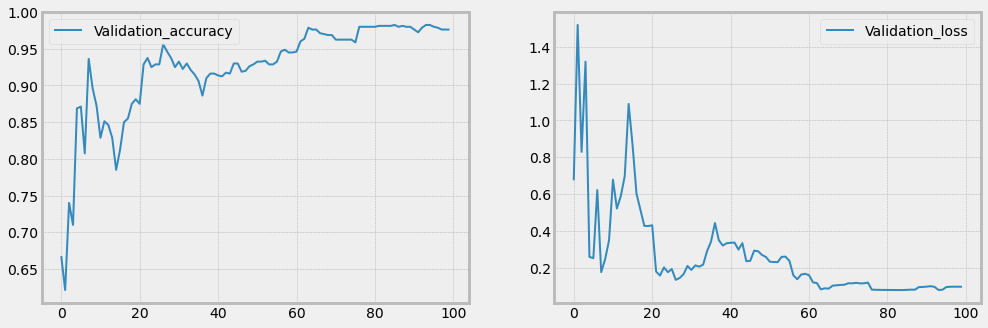

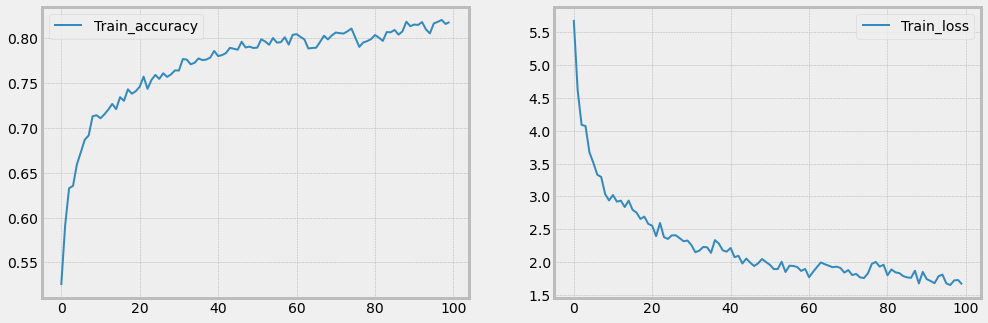

In [ ]:
#DM_time model metrics
metric = "accuracy"
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'],label='Validation_accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'],label='Validation_loss')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train_accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train_loss')
plt.legend()

#plt.plot(history.history["val_" + metric])


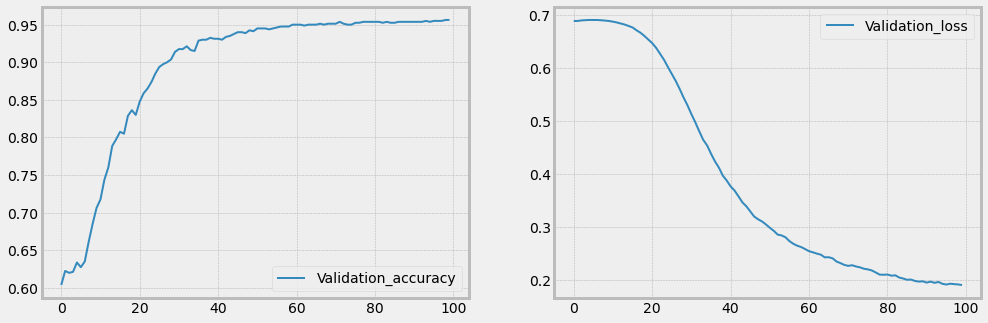

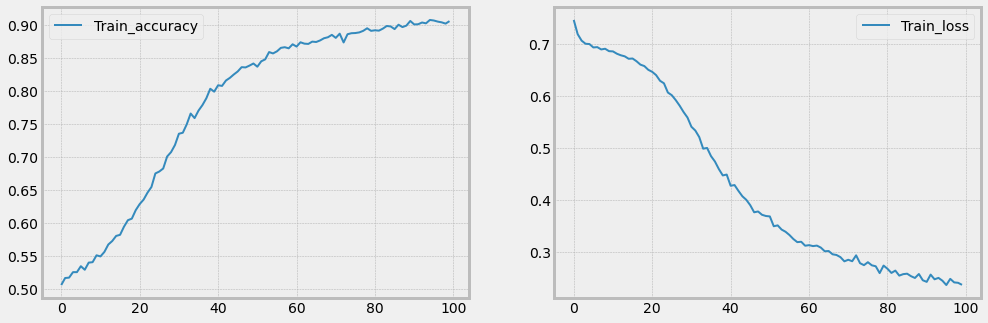

In [ ]:
#frequency_time metrics
metric = "accuracy"
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_2.history['val_accuracy'],label='Validation_accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_2.history['val_loss'],label='Validation_loss')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_2.history['accuracy'],label='Train_accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_2
         
         .history['loss'],label='Train_loss')
plt.legend()

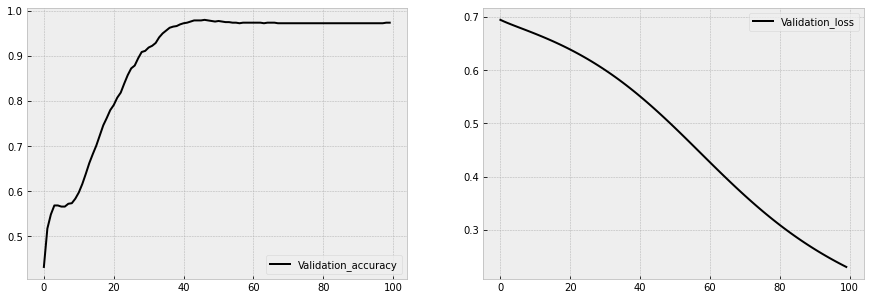

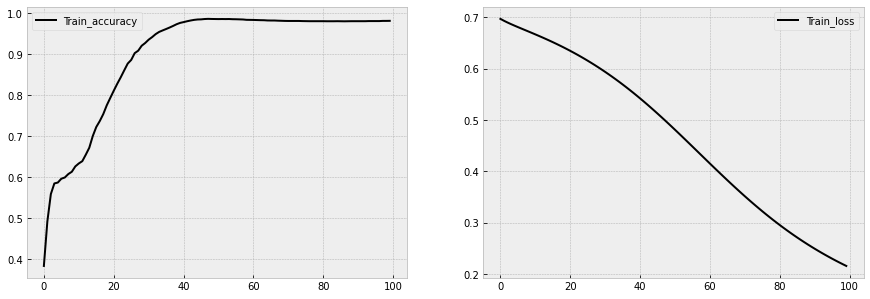

In [ ]:
#Series time metrics
metric = "accuracy"
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_3.history['val_accuracy'],label='Validation_accuracy',color='black')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_3.history['val_loss'],label='Validation_loss',color='black')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_3.history['accuracy'],label='Train_accuracy',color='black')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_3.history['loss'],label='Train_loss',color='black')
plt.legend()
